In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
import polars as pl
from scipy import stats
import seaborn as sns


data_dir: Path = Path('/mnt/eqa/zhangyuanfeng/methylation/data_for_plot/6_methcali/dmc_original')
before_files: list[Path] = list((data_dir / 'before').glob('*p.csv'))
after_files: list[Path] = list((data_dir / 'after').glob('*p.csv'))

In [2]:
df: pl.DataFrame = (pl.concat([pl.scan_csv(f,
                                           schema={'sample_pair': pl.String,
                                                   'lab': pl.String,
                                                   'p_type': pl.String,
                                                   'feature': pl.String,
                                                   'fgroup': pl.String,
                                                   'count': pl.Int64,
                                                   'tp': pl.Int64,
                                                   'tn': pl.Int64,
                                                   'fn': pl.Int64,
                                                   'fp': pl.Int64,
                                                   'recall': pl.Float64,
                                                   'precision': pl.Float64,
                                                   'f1_score': pl.Float64,
                                                   'mcc': pl.Float64,
                                                   'ppv': pl.Float64,
                                                   'npv': pl.Float64,
                                                   'roc_auc': pl.Float64})
                                 .drop('feature', 'fgroup')
                                 .with_columns(pl.lit(f.name[: -6]).alias('tool'),
                                               pl.lit(f.parent.name).alias('treatment'))
                                 .select('sample_pair','lab', 'tool', 'p_type',
                                         'treatment', 'count',
                                         'recall',  'precision', 'f1_score',
                                         'mcc', 'ppv', 'npv', 'roc_auc')
                               for f in (before_files + after_files)])
                    .sort(by=['sample_pair', 'lab', 'tool', 'p_type', 'treatment'])
                    .collect()
    )
df

shape: (480, 13)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ sample_pair ‚îÜ lab ‚îÜ tool                ‚îÜ p_type ‚îÜ ‚Ä¶ ‚îÜ mcc      ‚îÜ ppv      ‚îÜ npv      ‚îÜ roc_auc  ‚îÇ
‚îÇ ---         ‚îÜ --- ‚îÜ ---                 ‚îÜ ---    ‚îÜ   ‚îÜ ---      ‚îÜ ---      ‚îÜ ---      ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ str ‚îÜ str                 ‚îÜ str    ‚îÜ   ‚îÜ f64      ‚îÜ f64      ‚îÜ f64      ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ cpgtools            ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ null     ‚îÜ null     ‚îÜ 0.740204 ‚îÜ 0.5      ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ cpgtools            ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.771867 ‚îÜ 0.728997 ‚îÜ 0.984384 ‚îÜ 0.857393 ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ methylkit           ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.873486 ‚îÜ 0.98591  ‚îÜ 0.925388 ‚îÜ 0.91602  ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ methylkit           ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.83046  ‚îÜ 0.827088 ‚îÜ 0.97757  ‚îÜ 0.879272 ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ methylsig.beta_bino ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.828397 ‚îÜ 0.997394 ‚îÜ 0.926699 ‚îÜ 0.871083 ‚îÇ
‚îÇ             ‚îÜ     ‚îÜ mial                ‚îÜ        ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ          ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶                   ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.beta_bino ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.176023 ‚îÜ 0.036049 ‚îÜ 0.999817 ‚îÜ 0.90976  ‚îÇ
‚îÇ             ‚îÜ     ‚îÜ mial                ‚îÜ        ‚îÜ   ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ          ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.binomial  ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.246695 ‚îÜ 0.376513 ‚îÜ 0.955588 ‚îÜ 0.589688 ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.binomial  ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.068288 ‚îÜ 0.090497 ‚îÜ 0.952482 ‚îÜ 0.535585 ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.dss       ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.252017 ‚îÜ 0.401995 ‚îÜ 0.955349 ‚îÜ 0.587267 ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.dss       ‚îÜ p      ‚îÜ ‚Ä¶ ‚îÜ 0.102107 ‚îÜ 0.121529 ‚îÜ 0.95391  ‚îÜ 0.557696 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [3]:
def run_paired_test(before: pl.Series,
                    after: pl.Series,
                    alpha: float = .05):
    diff: pl.Series = (before - after).alias('diff')

    # Normality Test
    shapiro_stat, shapiro_p = stats.shapiro(diff)

    print(f'Shapiro-Wilk Normality Test: W={shapiro_stat:.3f}, p={shapiro_p:.3f}')
    if shapiro_p > 0.05:
        print('‚úÖ Normality Test passed. t test can be used.')
        t_stat, p_val = stats.ttest_rel(after, before)
        print(f'\nüëâ t test result:')
        print(f'  t = {t_stat:.3f}, samples = {diff.shape[0]}, p = {p_val:.3e}')
        print(f'  average diff = {diff.mean():.3f}')
        test_type = 't test'
        avg_diff = diff.mean()
    else:
        print('‚ùå Normality Test failed. Wilcoxon test will be used.')
        w_stat, p_val = stats.wilcoxon(before, after)
        print(f'\nüëâ Wilcoxon test result:')
        print(f'  W = {w_stat:.0f}, p = {p_val:.3e}')
        print(f'  median diff = {diff.median():.3f}')
        test_type = 'Wilcoxon'
        avg_diff = diff.median()

    avg_change = (after.mean() - before.mean()) * 100 / before.mean()

    if p_val < alpha:
        print('‚úÖ There is a significant difference between before and after treatment (p < 0.05)')
        significant = True
    else:
        print('‚ùå There is no significant difference between before and after treatment (p ‚â• 0.05)')
        significant = False

    return avg_diff, avg_change, test_type, p_val


df_pivot = (df.filter(pl.col('tool').str.contains_any(['methylkit', 'methylsig']),
           pl.col('p_type') == 'p')
   .pivot(index=['lab', 'sample_pair', 'tool'],
          on='treatment', values='mcc'))
run_paired_test(before=df_pivot['before'],
                after=df_pivot['after'])

Shapiro-Wilk Normality Test: W=0.940, p=0.000
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 472, p = 1.543e-23
  median diff = -0.168
‚úÖ There is a significant difference between before and after treatment (p < 0.05)


(-0.1678467705212254, 35.087354662098136, 'Wilcoxon', 1.542996293853424e-23)

In [26]:
wrong = (df.filter(pl.col('tool').str.contains_any(['methylkit', 'methylsig']),
           pl.col('p_type') == 'p')
   .pivot(index=['lab', 'sample_pair', 'tool'],
          on='treatment', values='mcc')
   .with_columns((pl.col('after') - pl.col('before')).alias('diff'))
   .filter(pl.col('diff') < 0))
wrong

shape: (12, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ lab ‚îÜ sample_pair ‚îÜ tool                    ‚îÜ after    ‚îÜ before   ‚îÜ diff      ‚îÇ
‚îÇ --- ‚îÜ ---         ‚îÜ ---                     ‚îÜ ---      ‚îÜ ---      ‚îÜ ---       ‚îÇ
‚îÇ str ‚îÜ str         ‚îÜ str                     ‚îÜ f64      ‚îÜ f64      ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BS1 ‚îÜ BC_vs_BL    ‚îÜ methylsig.beta_binomial ‚îÜ 0.828397 ‚îÜ 0.92523  ‚îÜ -0.096833 ‚îÇ
‚îÇ BS1 ‚îÜ BC_vs_BL    ‚îÜ methylsig.dss           ‚îÜ 0.830393 ‚îÜ 0.857159 ‚îÜ -0.026766 ‚îÇ
‚îÇ BS3 ‚îÜ BC_vs_BL    ‚îÜ methylsig.beta_binomial ‚îÜ 0.873496 ‚îÜ 0.924728 ‚îÜ -0.051231 ‚îÇ
‚îÇ BS3 ‚îÜ BC_vs_BL    ‚îÜ methylsig.dss           ‚îÜ 0.863532 ‚îÜ 0.864141 ‚îÜ -0.000608 ‚îÇ
‚îÇ BS4 ‚îÜ BC_vs_BL    ‚îÜ methylkit               ‚îÜ 0.62829  ‚îÜ 0.765976 ‚îÜ -0.137687 ‚îÇ
‚îÇ ‚Ä¶   ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶                       ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ BS4 ‚îÜ BC_vs_BL    ‚îÜ methylsig.dss           ‚îÜ 0.546669 ‚îÜ 0.754899 ‚îÜ -0.20823  ‚îÇ
‚îÇ EM1 ‚îÜ BC_vs_BL    ‚îÜ methylsig.beta_binomial ‚îÜ 0.856843 ‚îÜ 0.923756 ‚îÜ -0.066912 ‚îÇ
‚îÇ EM1 ‚îÜ BC_vs_BL    ‚îÜ methylsig.dss           ‚îÜ 0.85372  ‚îÜ 0.879566 ‚îÜ -0.025847 ‚îÇ
‚îÇ BS4 ‚îÜ D6_vs_D5    ‚îÜ methylsig.beta_binomial ‚îÜ 0.286433 ‚îÜ 0.287505 ‚îÜ -0.001072 ‚îÇ
‚îÇ BS4 ‚îÜ D6_vs_F7    ‚îÜ methylsig.beta_binomial ‚îÜ 0.102441 ‚îÜ 0.114202 ‚îÜ -0.011762 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [9]:
df.write_csv(data_dir / 'dmc_merged.csv')

In [5]:
from typing import Literal


def run_paired_test(before: pl.Series,
                    after: pl.Series,
                    alpha: float = .05,
                    return_item: Literal['test_type', 'p_val', 'diff', 'pct_change'] = 'p_val'):
    diff: pl.Series = (before - after).alias('diff')

    # Normality Test
    shapiro_stat, shapiro_p = stats.shapiro(diff)

    print(f'Shapiro-Wilk Normality Test: W={shapiro_stat:.3f}, p={shapiro_p:.3f}')
    if shapiro_p > 0.05:
        print('‚úÖ Normality Test passed. t test can be used.')
        t_stat, p_val = stats.ttest_rel(after, before)
        print(f'\nüëâ t test result:')
        print(f'  t = {t_stat:.3f}, samples = {diff.shape[0]}, p = {p_val:.3e}')
        print(f'  average diff = {diff.mean():.3f}')
        result_type = 't_test'
        avg_diff = diff.mean()
    else:
        print('‚ùå Normality Test failed. Wilcoxon test will be used.')
        w_stat, p_val = stats.wilcoxon(before, after)
        print(f'\nüëâ Wilcoxon test result:')
        print(f'  W = {w_stat:.0f}, p = {p_val:.3e}')
        print(f'  median diff = {diff.median():.3f}')
        result_type = 'wilcoxon'
        avg_diff = diff.median()

    if p_val < alpha:
        print('‚úÖ There is a significant difference between before and after treatment (p < 0.05)')
    else:
        print('‚ùå There is no significant difference between before and after treatment (p ‚â• 0.05)')

    # significant: bool = True if p_val < alpha else False
    if return_item == 'test_type':
        return result_type
    elif return_item == 'p_val':
        return p_val
    elif return_item == 'diff':
        return avg_diff
    else:
        return 100 * (after.mean() - before.mean()) / before.mean()


def get_result_type(before: pl.Series,
                    after: pl.Series,
                    alpha: float = .05):
    return run_paired_test(before, after, alpha, return_item='test_type')


def get_p_val(before: pl.Series,
               after: pl.Series,
               alpha: float = .05):
    return run_paired_test(before, after, alpha, return_item='p_val')


def get_diff(before: pl.Series,
             after: pl.Series,
             alpha: float = .05):
    return run_paired_test(before, after, alpha, return_item='diff')

def get_pct_change(before: pl.Series,
                   after: pl.Series,
                   alpha: float = .05):
    return run_paired_test(before, after, alpha, return_item='pct_change')

In [7]:
filtered = (df.filter(pl.col('tool').is_in(['methylkit', 'methylsig.beta_binomial',
                                            'methylsig.binomial', 'methylsig.dss']),
                      pl.col('p_type') == 'p')
              .drop_nulls(subset=['mcc'])
              .select('tool', 'sample_pair', 'lab', 'treatment', 'mcc')
              .pivot(index=['tool', 'lab', 'sample_pair'],
                     on='treatment', values='mcc'))
filtered

shape: (192, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ tool                    ‚îÜ lab ‚îÜ sample_pair ‚îÜ after    ‚îÜ before   ‚îÇ
‚îÇ ---                     ‚îÜ --- ‚îÜ ---         ‚îÜ ---      ‚îÜ ---      ‚îÇ
‚îÇ str                     ‚îÜ str ‚îÜ str         ‚îÜ f64      ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ methylkit               ‚îÜ BS1 ‚îÜ BC_vs_BL    ‚îÜ 0.873486 ‚îÜ 0.83046  ‚îÇ
‚îÇ methylsig.beta_binomial ‚îÜ BS1 ‚îÜ BC_vs_BL    ‚îÜ 0.828397 ‚îÜ 0.92523  ‚îÇ
‚îÇ methylsig.binomial      ‚îÜ BS1 ‚îÜ BC_vs_BL    ‚îÜ 0.838517 ‚îÜ 0.836452 ‚îÇ
‚îÇ methylsig.dss           ‚îÜ BS1 ‚îÜ BC_vs_BL    ‚îÜ 0.830393 ‚îÜ 0.857159 ‚îÇ
‚îÇ methylkit               ‚îÜ BS2 ‚îÜ BC_vs_BL    ‚îÜ 0.934009 ‚îÜ 0.790107 ‚îÇ
‚îÇ ‚Ä¶                       ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ methylsig.dss           ‚îÜ PS3 ‚îÜ D6_vs_M8    ‚îÜ 0.270877 ‚îÜ 0.270877 ‚îÇ
‚îÇ methylkit               ‚îÜ RR1 ‚îÜ D6_vs_M8    ‚îÜ 0.186379 ‚îÜ 0.011139 ‚îÇ
‚îÇ methylsig.beta_binomial ‚îÜ RR1 ‚îÜ D6_vs_M8    ‚îÜ 0.353221 ‚îÜ 0.176023 ‚îÇ
‚îÇ methylsig.binomial      ‚îÜ RR1 ‚îÜ D6_vs_M8    ‚îÜ 0.246695 ‚îÜ 0.068288 ‚îÇ
‚îÇ methylsig.dss           ‚îÜ RR1 ‚îÜ D6_vs_M8    ‚îÜ 0.252017 ‚îÜ 0.102107 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [17]:
tool_result1: pl.DataFrame = (filtered.group_by('tool')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_p_val(x.struct.field('before'),
                                                                              x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('p_value'))
                                      .with_columns(pl.col('p_value').list.first().alias('p_value'))
                                      .with_columns(pl.when(pl.col('p_value') < 0.05)
                                                      .then(pl.lit(True))
                                                      .otherwise(pl.lit(False))
                                                      .alias('significant')))
tool_result2: pl.DataFrame = (filtered.group_by('tool')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff'))
                                      .with_columns(pl.col('diff').list.first().alias('diff')))
tool_result3: pl.DataFrame = (filtered.group_by('tool')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff_pct'))
                                      .with_columns(pl.col('diff_pct').list.first().alias('diff_pct')))
tool_result4: pl.DataFrame = (filtered.group_by('tool')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_result_type(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.String)
                                             .alias('test_type'))
                                      .with_columns(pl.col('test_type').list.first().alias('test_type')))

tool_result: pl.DataFrame = (tool_result1.join(other=tool_result2,
                                               on=['tool'],
                                               how='left')
                                         .join(other=tool_result3,
                                               on=['tool'],
                                               how='left')
                                         .join(other=tool_result4,
                                               on=['tool'],
                                               how='left')
                                         .select('tool', 'diff', 'diff_pct', 'test_type',
                                                 'p_value', 'significant')
                                         .rename({'tool': 'Tool',
                                                  'diff': 'Average Diff',
                                                  'diff_pct': 'Average Diff Change (%)',
                                                  'test_type': 'Test Type',
                                                  'p_value': 'P value',
                                                  'significant': 'Significant'}))

Shapiro-Wilk Normality Test: W=0.906, p=0.001
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.912, p=0.002
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.897, p=0.001
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 49, p = 5.028e-06
  median diff = -0.155
‚úÖ There is a significant difference between before and after treatment (p < 0.05)

üëâ Wilcoxon test result:
  W = 23, p = 7.202e-07
  median diff = -0.170
‚úÖ There is a significant difference between before and after treatment (p < 0.05)
Shapiro-Wilk Normality Test: W=0.921, p=0.003
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 37, p = 2.089e-06
  median diff = -0.134
‚úÖ There is a significant difference between before and after treatment (p < 0.05)

üëâ Wilcoxon test result:
  W = 10, p = 1.014e-08
  median diff = -0.198
‚úÖ There is a significant difference betwee

In [18]:
tool_result

shape: (4, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Tool                 ‚îÜ Average Diff ‚îÜ Average Diff Change  ‚îÜ Test Type ‚îÜ P value   ‚îÜ Significant ‚îÇ
‚îÇ ---                  ‚îÜ ---          ‚îÜ (%)                  ‚îÜ ---       ‚îÜ ---       ‚îÜ ---         ‚îÇ
‚îÇ str                  ‚îÜ f64          ‚îÜ ---                  ‚îÜ str       ‚îÜ f64       ‚îÜ bool        ‚îÇ
‚îÇ                      ‚îÜ              ‚îÜ f64                  ‚îÜ           ‚îÜ           ‚îÜ             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ methylkit            ‚îÜ -0.197757    ‚îÜ -0.197757            ‚îÜ wilcoxon  ‚îÜ 1.0136e-8 ‚îÜ true        ‚îÇ
‚îÇ methylsig.dss        ‚îÜ -0.13363     ‚îÜ -0.13363             ‚îÜ wilcoxon  ‚îÜ 0.000002  ‚îÜ true        ‚îÇ
‚îÇ methylsig.binomial   ‚îÜ -0.170416    ‚îÜ -0.170416            ‚îÜ wilcoxon  ‚îÜ 7.2017e-7 ‚îÜ true        ‚îÇ
‚îÇ methylsig.beta_binom ‚îÜ -0.154867    ‚îÜ -0.154867            ‚îÜ wilcoxon  ‚îÜ 0.000005  ‚îÜ true        ‚îÇ
‚îÇ ial                  ‚îÜ              ‚îÜ                      ‚îÜ           ‚îÜ           ‚îÜ             ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [19]:
sample_pair_result1: pl.DataFrame = (filtered.group_by('sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_p_val(x.struct.field('before'),
                                                                              x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('p_value'))
                                      .with_columns(pl.col('p_value').list.first().alias('p_value'))
                                      .with_columns(pl.when(pl.col('p_value') < 0.05)
                                                      .then(pl.lit(True))
                                                      .otherwise(pl.lit(False))
                                                      .alias('significant')))
sample_pair_result2: pl.DataFrame = (filtered.group_by('sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff'))
                                      .with_columns(pl.col('diff').list.first().alias('diff')))
sample_pair_result3: pl.DataFrame = (filtered.group_by('sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff_pct'))
                                      .with_columns(pl.col('diff_pct').list.first().alias('diff_pct')))
sample_pair_result4: pl.DataFrame = (filtered.group_by('sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_result_type(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.String)
                                             .alias('test_type'))
                                      .with_columns(pl.col('test_type').list.first().alias('test_type')))

sample_pair_result: pl.DataFrame = (sample_pair_result1.join(other=sample_pair_result2,
                                               on=['sample_pair'],
                                               how='left')
                                         .join(other=sample_pair_result3,
                                               on=['sample_pair'],
                                               how='left')
                                         .join(other=sample_pair_result4,
                                               on=['sample_pair'],
                                               how='left')
                                         .select('sample_pair', 'diff', 'diff_pct', 'test_type',
                                                 'p_value', 'significant')
                                         .rename({'sample_pair': 'Sample Pair',
                                                  'diff': 'Average Diff',
                                                  'diff_pct': 'Average Diff Change (%)',
                                                  'test_type': 'Test Type',
                                                  'p_value': 'P value',
                                                  'significant': 'Significant'}))

Shapiro-Wilk Normality Test: W=0.895, p=0.000
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 2, p = 9.087e-08
  median diff = -0.178
‚úÖ There is a significant difference between before and after treatment (p < 0.05)
Shapiro-Wilk Normality Test: W=0.868, p=0.000
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.948, p=0.034
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 1, p = 8.387e-08
  median diff = -0.216
‚úÖ There is a significant difference between before and after treatment (p < 0.05)

üëâ Wilcoxon test result:
  W = 194, p = 1.048e-02
  median diff = -0.034
‚úÖ There is a significant difference between before and after treatment (p < 0.05)
Shapiro-Wilk Normality Test: W=0.917, p=0.002
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 0, p = 1.648e-08
  median diff = -0.194
‚úÖ There is a significant difference between 

In [20]:
sample_pair_result

shape: (4, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Sample Pair ‚îÜ Average Diff ‚îÜ Average Diff Change (%) ‚îÜ Test Type ‚îÜ P value   ‚îÜ Significant ‚îÇ
‚îÇ ---         ‚îÜ ---          ‚îÜ ---                     ‚îÜ ---       ‚îÜ ---       ‚îÜ ---         ‚îÇ
‚îÇ str         ‚îÜ f64          ‚îÜ f64                     ‚îÜ str       ‚îÜ f64       ‚îÜ bool        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ D6_vs_D5    ‚îÜ -0.215847    ‚îÜ -0.215847               ‚îÜ wilcoxon  ‚îÜ 8.3874e-8 ‚îÜ true        ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ -0.194367    ‚îÜ -0.194367               ‚îÜ wilcoxon  ‚îÜ 1.6479e-8 ‚îÜ true        ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ -0.034182    ‚îÜ -0.034182               ‚îÜ wilcoxon  ‚îÜ 0.010478  ‚îÜ true        ‚îÇ
‚îÇ D6_vs_F7    ‚îÜ -0.177553    ‚îÜ -0.177553               ‚îÜ wilcoxon  ‚îÜ 9.0873e-8 ‚îÜ true        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [21]:
lab_result1: pl.DataFrame = (filtered.group_by('lab')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_p_val(x.struct.field('before'),
                                                                              x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('p_value'))
                                      .with_columns(pl.col('p_value').list.first().alias('p_value'))
                                      .with_columns(pl.when(pl.col('p_value') < 0.05)
                                                      .then(pl.lit(True))
                                                      .otherwise(pl.lit(False))
                                                      .alias('significant')))
lab_result2: pl.DataFrame = (filtered.group_by('lab')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff'))
                                      .with_columns(pl.col('diff').list.first().alias('diff')))
lab_result3: pl.DataFrame = (filtered.group_by('lab')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff_pct'))
                                      .with_columns(pl.col('diff_pct').list.first().alias('diff_pct')))
lab_result4: pl.DataFrame = (filtered.group_by('lab')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_result_type(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.String)
                                             .alias('test_type'))
                                      .with_columns(pl.col('test_type').list.first().alias('test_type')))

lab_result: pl.DataFrame = (lab_result1.join(other=lab_result2,
                                               on=['lab'],
                                               how='left')
                                         .join(other=lab_result3,
                                               on=['lab'],
                                               how='left')
                                         .join(other=lab_result4,
                                               on=['lab'],
                                               how='left')
                                         .select('lab', 'diff', 'diff_pct', 'test_type',
                                                 'p_value', 'significant')
                                         .rename({'lab': 'Tool',
                                                  'diff': 'Average Diff',
                                                  'diff_pct': 'Average Diff Change (%)',
                                                  'test_type': 'Test Type',
                                                  'p_value': 'P value',
                                                  'significant': 'Significant'}))

Shapiro-Wilk Normality Test: W=0.873, p=0.031
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.949, p=0.477
‚úÖ Normality Test passed. t test can be used.

üëâ t test result:
  t = 17.057, samples = 16, p = 3.125e-11
  average diff = -0.177
‚úÖ There is a significant difference between before and after treatment (p < 0.05)
Shapiro-Wilk Normality Test: W=0.933, p=0.270
‚úÖ Normality Test passed. t test can be used.

üëâ t test result:
  t = 5.565, samples = 16, p = 5.407e-05
  average diff = -0.144
‚úÖ There is a significant difference between before and after treatment (p < 0.05)
Shapiro-Wilk Normality Test: W=0.586, p=0.000
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.930, p=0.247
‚úÖ Normality Test passed. t test can be used.

üëâ t test result:
  t = 13.998, samples = 16, p = 5.132e-10
  average diff = -0.261
‚úÖ There is a significant difference between before and after treatment (p < 0.05)

üëâ W

In [22]:
lab_result

shape: (12, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Tool ‚îÜ Average Diff ‚îÜ Average Diff Change (%) ‚îÜ Test Type ‚îÜ P value    ‚îÜ Significant ‚îÇ
‚îÇ ---  ‚îÜ ---          ‚îÜ ---                     ‚îÜ ---       ‚îÜ ---        ‚îÜ ---         ‚îÇ
‚îÇ str  ‚îÜ f64          ‚îÜ f64                     ‚îÜ str       ‚îÜ f64        ‚îÜ bool        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ EM3  ‚îÜ -0.256986    ‚îÜ -0.256986               ‚îÜ t_test    ‚îÜ 9.0400e-10 ‚îÜ true        ‚îÇ
‚îÇ PS1  ‚îÜ 0.0          ‚îÜ 0.0                     ‚îÜ wilcoxon  ‚îÜ 0.067889   ‚îÜ false       ‚îÇ
‚îÇ PS2  ‚îÜ 0.0          ‚îÜ 0.0                     ‚îÜ wilcoxon  ‚îÜ 0.067889   ‚îÜ false       ‚îÇ
‚îÇ BS2  ‚îÜ -0.22081     ‚îÜ -0.22081                ‚îÜ t_test    ‚îÜ 1.1335e-7  ‚îÜ true        ‚îÇ
‚îÇ EM1  ‚îÜ -0.144262    ‚îÜ -0.144262               ‚îÜ t_test    ‚îÜ 0.000054   ‚îÜ true        ‚îÇ
‚îÇ ‚Ä¶    ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶                       ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ BS4  ‚îÜ -0.008884    ‚îÜ -0.008884               ‚îÜ wilcoxon  ‚îÜ 0.86026    ‚îÜ false       ‚îÇ
‚îÇ RR1  ‚îÜ -0.17692     ‚îÜ -0.17692                ‚îÜ t_test    ‚îÜ 3.1247e-11 ‚îÜ true        ‚îÇ
‚îÇ BS3  ‚îÜ -0.16359     ‚îÜ -0.16359                ‚îÜ t_test    ‚îÜ 0.000018   ‚îÜ true        ‚îÇ
‚îÇ PS3  ‚îÜ 0.0          ‚îÜ 0.0                     ‚îÜ wilcoxon  ‚îÜ 0.067889   ‚îÜ false       ‚îÇ
‚îÇ EM2  ‚îÜ -0.261042    ‚îÜ -0.261042               ‚îÜ t_test    ‚îÜ 5.1321e-10 ‚îÜ true        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [23]:
tool_pair1: pl.DataFrame = (filtered.group_by('tool', 'sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_p_val(x.struct.field('before'),
                                                                              x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('p_value'))
                                      .with_columns(pl.col('p_value').list.first().alias('p_value'))
                                      .with_columns(pl.when(pl.col('p_value') < 0.05)
                                                      .then(pl.lit(True))
                                                      .otherwise(pl.lit(False))
                                                      .alias('significant')))
tool_pair2: pl.DataFrame = (filtered.group_by('tool', 'sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff'))
                                      .with_columns(pl.col('diff').list.first().alias('diff')))
tool_pair3: pl.DataFrame = (filtered.group_by('tool', 'sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_diff(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.Float64)
                                             .alias('diff_pct'))
                                      .with_columns(pl.col('diff_pct').list.first().alias('diff_pct')))
tool_pair4: pl.DataFrame = (filtered.group_by('tool', 'sample_pair')
                                      .agg(pl.struct(['before', 'after'])
                                             .map_batches(lambda x: get_result_type(x.struct.field('before'),
                                                                             x.struct.field('after')),
                                                          return_dtype=pl.String)
                                             .alias('test_type'))
                                      .with_columns(pl.col('test_type').list.first().alias('test_type')))

tool_pair: pl.DataFrame = (tool_pair1.join(other=tool_pair2,
                                               on=['tool', 'sample_pair'],
                                               how='left')
                                         .join(other=tool_pair3,
                                               on=['tool', 'sample_pair'],
                                               how='left')
                                         .join(other=tool_pair4,
                                               on=['tool', 'sample_pair'],
                                               how='left')
                                         .select('tool', 'sample_pair', 'diff', 'diff_pct', 'test_type',
                                                 'p_value', 'significant')
                                         .rename({'tool': 'Tool',
                                                  'sample_pair': 'Sample Pair',
                                                  'diff': 'Average Diff',
                                                  'diff_pct': 'Average Diff Change (%)',
                                                  'test_type': 'Test Type',
                                                  'p_value': 'P value',
                                                  'significant': 'Significant'}))

Shapiro-Wilk Normality Test: W=0.838, p=0.026
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.872, p=0.069
‚úÖ Normality Test passed. t test can be used.

üëâ t test result:
  t = -0.341, samples = 12, p = 7.397e-01
  average diff = 0.012
‚ùå There is no significant difference between before and after treatment (p ‚â• 0.05)
Shapiro-Wilk Normality Test: W=0.850, p=0.036
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.845, p=0.032
‚ùå Normality Test failed. Wilcoxon test will be used.
Shapiro-Wilk Normality Test: W=0.896, p=0.141
‚úÖ Normality Test passed. t test can be used.

üëâ t test result:
  t = 1.427, samples = 12, p = 1.813e-01
  average diff = -0.045
‚ùå There is no significant difference between before and after treatment (p ‚â• 0.05)
Shapiro-Wilk Normality Test: W=0.963, p=0.820
‚úÖ Normality Test passed. t test can be used.

üëâ t test result:
  t = 2.936, samples = 12, p = 1.355e-02
  average 

In [ ]:
tool_pair = tool_pair.sort(by=['Tool', 'Sample Pair'])
tool_pair

shape: (16, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Tool           ‚îÜ Sample Pair ‚îÜ Average Diff ‚îÜ Average Diff  ‚îÜ Test Type ‚îÜ P value  ‚îÜ Significant ‚îÇ
‚îÇ ---            ‚îÜ ---         ‚îÜ ---          ‚îÜ Change (%)    ‚îÜ ---       ‚îÜ ---      ‚îÜ ---         ‚îÇ
‚îÇ str            ‚îÜ str         ‚îÜ f64          ‚îÜ ---           ‚îÜ str       ‚îÜ f64      ‚îÜ bool        ‚îÇ
‚îÇ                ‚îÜ             ‚îÜ              ‚îÜ f64           ‚îÜ           ‚îÜ          ‚îÜ             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ methylkit      ‚îÜ BC_vs_BL    ‚îÜ -0.101627    ‚îÜ -0.101627     ‚îÜ t_test    ‚îÜ 0.013554 ‚îÜ true        ‚îÇ
‚îÇ methylkit      ‚îÜ D6_vs_D5    ‚îÜ -0.24678     ‚îÜ -0.24678      ‚îÜ wilcoxon  ‚îÜ 0.000977 ‚îÜ true        ‚îÇ
‚îÇ methylkit      ‚îÜ D6_vs_F7    ‚îÜ -0.175296    ‚îÜ -0.175296     ‚îÜ t_test    ‚îÜ 0.000012 ‚îÜ true        ‚îÇ
‚îÇ methylkit      ‚îÜ D6_vs_M8    ‚îÜ -0.207782    ‚îÜ -0.207782     ‚îÜ wilcoxon  ‚îÜ 0.000488 ‚îÜ true        ‚îÇ
‚îÇ methylsig.beta ‚îÜ BC_vs_BL    ‚îÜ 0.011674     ‚îÜ 0.011674      ‚îÜ t_test    ‚îÜ 0.73971  ‚îÜ false       ‚îÇ
‚îÇ _binomial      ‚îÜ             ‚îÜ              ‚îÜ               ‚îÜ           ‚îÜ          ‚îÜ             ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ methylsig.bino ‚îÜ D6_vs_M8    ‚îÜ -0.190548    ‚îÜ -0.190548     ‚îÜ wilcoxon  ‚îÜ 0.001953 ‚îÜ true        ‚îÇ
‚îÇ mial           ‚îÜ             ‚îÜ              ‚îÜ               ‚îÜ           ‚îÜ          ‚îÜ             ‚îÇ
‚îÇ methylsig.dss  ‚îÜ BC_vs_BL    ‚îÜ -0.017584    ‚îÜ -0.017584     ‚îÜ t_test    ‚îÜ 0.523148 ‚îÜ false       ‚îÇ
‚îÇ methylsig.dss  ‚îÜ D6_vs_D5    ‚îÜ -0.169677    ‚îÜ -0.169677     ‚îÜ wilcoxon  ‚îÜ 0.003906 ‚îÜ true        ‚îÇ
‚îÇ methylsig.dss  ‚îÜ D6_vs_F7    ‚îÜ -0.146768    ‚îÜ -0.146768     ‚îÜ wilcoxon  ‚îÜ 0.003906 ‚îÜ true        ‚îÇ
‚îÇ methylsig.dss  ‚îÜ D6_vs_M8    ‚îÜ -0.156801    ‚îÜ -0.156801     ‚îÜ wilcoxon  ‚îÜ 0.001953 ‚îÜ true        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [11]:
filtered = df.filter(pl.col('tool').is_in(['methylkit', 'methylsig.beta_binomial', 'methylsig.binomial', 'methylsig.dss']),
          pl.col('p_type') == 'p').drop_nulls(subset=['mcc'])
filtered.write_csv(data_dir / 'dmc_filtered.csv')

In [6]:
filtered_pivot: pl.DataFrame = (pl.read_csv(data_dir / 'dmc_filtered.csv')
                                  .select('sample_pair', 'lab', 'tool', 'treatment', 'mcc')
                                  .pivot(index=['sample_pair', 'lab', 'tool'],
                                         on='treatment', values='mcc')
                                  .with_columns((pl.col('after') - pl.col('before')).alias('diff')))
filtered_pivot

shape: (192, 6)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ sample_pair ‚îÜ lab ‚îÜ tool                    ‚îÜ after    ‚îÜ before   ‚îÜ diff      ‚îÇ
‚îÇ ---         ‚îÜ --- ‚îÜ ---                     ‚îÜ ---      ‚îÜ ---      ‚îÜ ---       ‚îÇ
‚îÇ str         ‚îÜ str ‚îÜ str                     ‚îÜ f64      ‚îÜ f64      ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ methylkit               ‚îÜ 0.873486 ‚îÜ 0.83046  ‚îÜ 0.043026  ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ methylsig.beta_binomial ‚îÜ 0.828397 ‚îÜ 0.92523  ‚îÜ -0.096833 ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ methylsig.binomial      ‚îÜ 0.838517 ‚îÜ 0.836452 ‚îÜ 0.002065  ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS1 ‚îÜ methylsig.dss           ‚îÜ 0.830393 ‚îÜ 0.857159 ‚îÜ -0.026766 ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ BS2 ‚îÜ methylkit               ‚îÜ 0.934009 ‚îÜ 0.790107 ‚îÜ 0.143902  ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶                       ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ PS3 ‚îÜ methylsig.dss           ‚îÜ 0.270877 ‚îÜ 0.270877 ‚îÜ 0.0       ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylkit               ‚îÜ 0.186379 ‚îÜ 0.011139 ‚îÜ 0.175241  ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.beta_binomial ‚îÜ 0.353221 ‚îÜ 0.176023 ‚îÜ 0.177198  ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.binomial      ‚îÜ 0.246695 ‚îÜ 0.068288 ‚îÜ 0.178407  ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ RR1 ‚îÜ methylsig.dss           ‚îÜ 0.252017 ‚îÜ 0.102107 ‚îÜ 0.14991   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [7]:
def run_paired_test(before: pl.Series,
                    after: pl.Series,
                    alpha: float = .05):
    diff: pl.Series = (before - after).alias('diff')

    # Normality Test
    shapiro_stat, shapiro_p = stats.shapiro(diff)

    print(f'Shapiro-Wilk Normality Test: W={shapiro_stat:.3f}, p={shapiro_p:.3f}')
    if shapiro_p > 0.05:
        print('‚úÖ Normality Test passed. t test can be used.')
        t_stat, p_val = stats.ttest_rel(after, before)
        print(f'\nüëâ t test result:')
        print(f'  t = {t_stat:.3f}, samples = {diff.shape[0]}, p = {p_val:.3e}')
        print(f'  average diff = {diff.mean():.3f}')
        test_type = 't test'
        avg_diff = diff.mean()
    else:
        print('‚ùå Normality Test failed. Wilcoxon test will be used.')
        w_stat, p_val = stats.wilcoxon(before, after)
        print(f'\nüëâ Wilcoxon test result:')
        print(f'  W = {w_stat:.0f}, p = {p_val:.3e}')
        print(f'  median diff = {diff.median():.3f}')
        test_type = 'Wilcoxon'
        avg_diff = diff.median()

    avg_change = (after.mean() - before.mean()) * 100 / before.mean()

    if p_val < alpha:
        print('‚úÖ There is a significant difference between before and after treatment (p < 0.05)')
        significant = True
    else:
        print('‚ùå There is no significant difference between before and after treatment (p ‚â• 0.05)')
        significant = False

    return avg_diff, avg_change, test_type, p_val

In [8]:
paired_test_result = []
for sample_pair in ('D6_vs_D5', 'D6_vs_F7', 'D6_vs_M8', 'BC_vs_BL'):
    for tool in ('methylkit', 'methylsig.beta_binomial', 'methylsig.binomial', 'methylsig.dss'):
        print(f'\n=== {sample_pair} - {tool} ===')
        subset = filtered_pivot.filter((pl.col('sample_pair') == sample_pair) &
                                      (pl.col('tool') == tool))
        avg_diff, avg_change, test_type, p_val = run_paired_test(before=subset['before'],
                                                                 after=subset['after'])
        paired_test_result.append({
            'sample_pair': sample_pair, 'tool': tool,
            'avg_diff': avg_diff,
            'avg_change_pct': avg_change,
            'test_type': test_type,
            'p_value': p_val,
            'significant': True if p_val < 0.05 else False
        })


=== D6_vs_D5 - methylkit ===
Shapiro-Wilk Normality Test: W=0.842, p=0.029
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 0, p = 9.766e-04
  median diff = -0.247
‚úÖ There is a significant difference between before and after treatment (p < 0.05)

=== D6_vs_D5 - methylsig.beta_binomial ===
Shapiro-Wilk Normality Test: W=0.837, p=0.026
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 1, p = 7.812e-03
  median diff = -0.215
‚úÖ There is a significant difference between before and after treatment (p < 0.05)

=== D6_vs_D5 - methylsig.binomial ===
Shapiro-Wilk Normality Test: W=0.838, p=0.026
‚ùå Normality Test failed. Wilcoxon test will be used.

üëâ Wilcoxon test result:
  W = 0, p = 3.906e-03
  median diff = -0.212
‚úÖ There is a significant difference between before and after treatment (p < 0.05)

=== D6_vs_D5 - methylsig.dss ===
Shapiro-Wilk Normality Test: W=0.851, p=0.038
‚ùå Normality Test failed. Wil

In [11]:
paired_test_result = pl.DataFrame(paired_test_result).sort(by=['tool', 'sample_pair'])
paired_test_result

shape: (16, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ sample_pair ‚îÜ tool             ‚îÜ avg_diff  ‚îÜ avg_change_pct ‚îÜ test_type ‚îÜ p_value  ‚îÜ significant ‚îÇ
‚îÇ ---         ‚îÜ ---              ‚îÜ ---       ‚îÜ ---            ‚îÜ ---       ‚îÜ ---      ‚îÜ ---         ‚îÇ
‚îÇ str         ‚îÜ str              ‚îÜ f64       ‚îÜ f64            ‚îÜ str       ‚îÜ f64      ‚îÜ bool        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ BC_vs_BL    ‚îÜ methylkit        ‚îÜ -0.101627 ‚îÜ 13.218663      ‚îÜ t test    ‚îÜ 0.013554 ‚îÜ true        ‚îÇ
‚îÇ D6_vs_D5    ‚îÜ methylkit        ‚îÜ -0.24678  ‚îÜ 70.290847      ‚îÜ Wilcoxon  ‚îÜ 0.000977 ‚îÜ true        ‚îÇ
‚îÇ D6_vs_F7    ‚îÜ methylkit        ‚îÜ -0.175296 ‚îÜ 86.103178      ‚îÜ t test    ‚îÜ 0.000012 ‚îÜ true        ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ methylkit        ‚îÜ -0.207782 ‚îÜ 96.884391      ‚îÜ Wilcoxon  ‚îÜ 0.000488 ‚îÜ true        ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ methylsig.beta_b ‚îÜ 0.011674  ‚îÜ -1.316888      ‚îÜ t test    ‚îÜ 0.73971  ‚îÜ false       ‚îÇ
‚îÇ             ‚îÜ inomial          ‚îÜ           ‚îÜ                ‚îÜ           ‚îÜ          ‚îÜ             ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶                ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶         ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶           ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ methylsig.binomi ‚îÜ -0.190548 ‚îÜ 70.633711      ‚îÜ Wilcoxon  ‚îÜ 0.001953 ‚îÜ true        ‚îÇ
‚îÇ             ‚îÜ al               ‚îÜ           ‚îÜ                ‚îÜ           ‚îÜ          ‚îÜ             ‚îÇ
‚îÇ BC_vs_BL    ‚îÜ methylsig.dss    ‚îÜ -0.017584 ‚îÜ 2.090142       ‚îÜ t test    ‚îÜ 0.523148 ‚îÜ false       ‚îÇ
‚îÇ D6_vs_D5    ‚îÜ methylsig.dss    ‚îÜ -0.169677 ‚îÜ 37.695159      ‚îÜ Wilcoxon  ‚îÜ 0.003906 ‚îÜ true        ‚îÇ
‚îÇ D6_vs_F7    ‚îÜ methylsig.dss    ‚îÜ -0.146768 ‚îÜ 52.56313       ‚îÜ Wilcoxon  ‚îÜ 0.003906 ‚îÜ true        ‚îÇ
‚îÇ D6_vs_M8    ‚îÜ methylsig.dss    ‚îÜ -0.156801 ‚îÜ 52.874168      ‚îÜ Wilcoxon  ‚îÜ 0.001953 ‚îÜ true        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

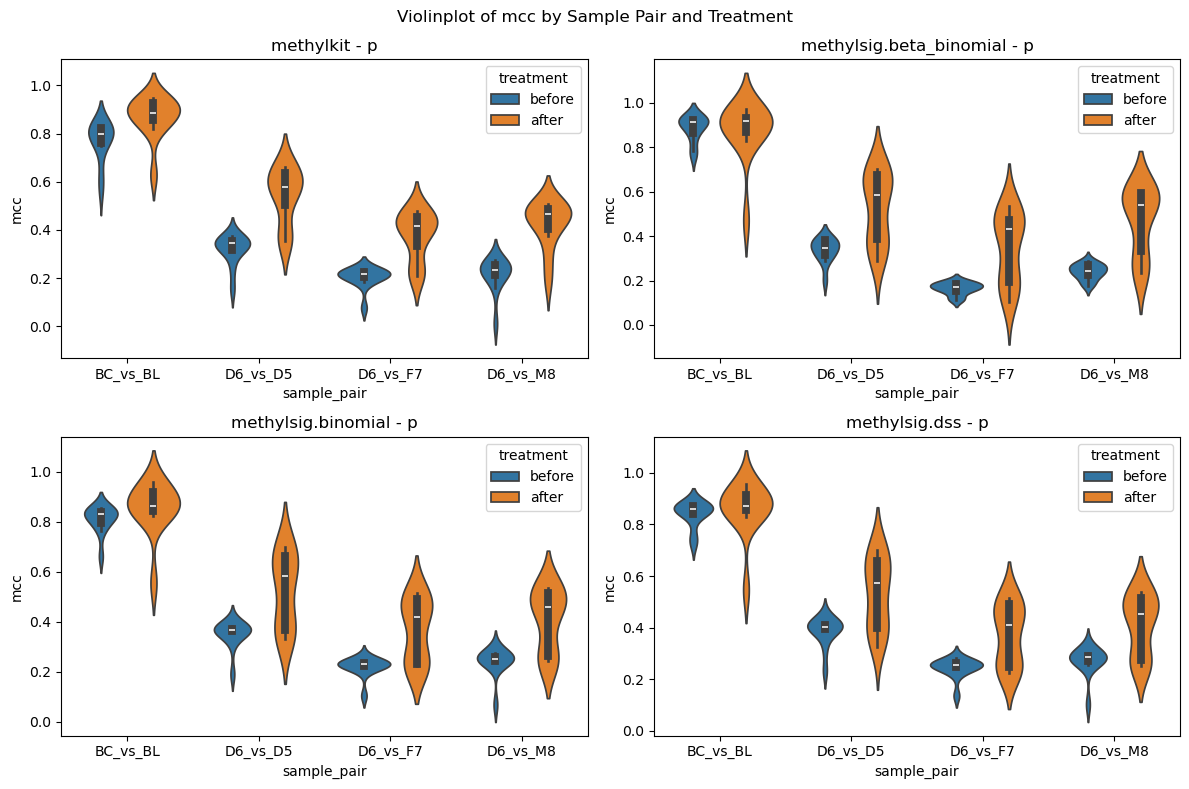

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

tools = ['methylkit', 'methylsig.beta_binomial', 'methylsig.binomial', 'methylsig.dss']
p_types = ['p', 'q']
metric = 'mcc'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

plt.suptitle(f'Violinplot of {metric} by Sample Pair and Treatment')

for i, tool in enumerate(tools):
    ax = axes[i]
    sns.violinplot(data=df.filter(pl.col('tool') == tool).to_pandas(),
                   x='sample_pair', y=metric, hue='treatment', ax=ax,
                   hue_order=['before', 'after'])
    ax.set_title(f'{tool} - p')


plt.tight_layout()

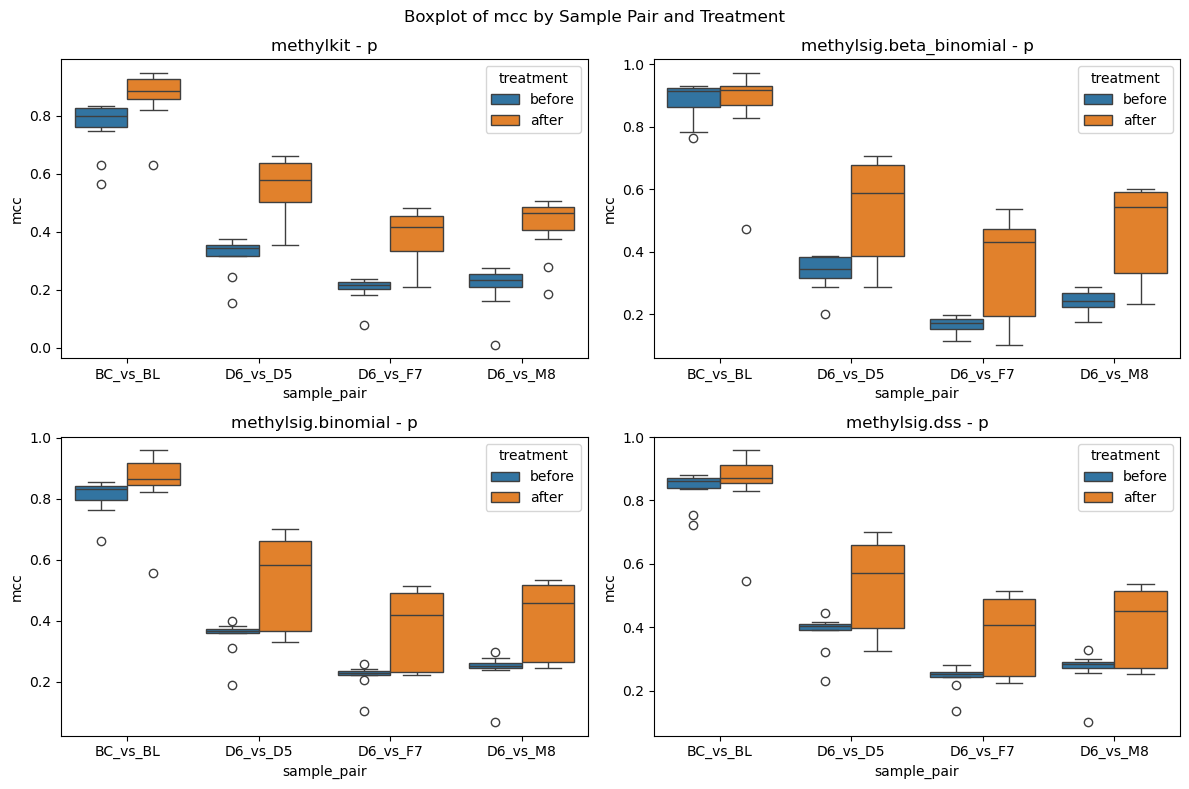

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

tools = ['methylkit', 'methylsig.beta_binomial', 'methylsig.binomial', 'methylsig.dss']
p_types = ['p', 'q']
metric = 'mcc'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

plt.suptitle(f'Boxplot of {metric} by Sample Pair and Treatment')

for i, tool in enumerate(tools):
    ax = axes[i]
    sns.boxplot(data=df.filter(pl.col('tool') == tool).to_pandas(),
                x='sample_pair', y=metric, hue='treatment', ax=ax,
                hue_order=['before', 'after'])
    ax.set_title(f'{tool} - p')


plt.tight_layout()